In [ ]:
%pip install seaborn 
%pip install pyarrow
%pip install --upgrade pip
%pip install nbformat

In [1]:
import pyarrow
import seaborn as sns
import pandas as pd
df = pd.read_parquet('./Data/Bus/CleanedBusData.parquet')
print(df.columns)

Index(['Timestamp', 'LineID', 'TimeFrame', 'VehicleJourneyID', 'Operator',
       'Congestion', 'LonWGS84', 'LatWGS84', 'Delay', 'BlockID', 'VehicleID',
       'AtStop', 'datetime', 'Time', 'Day', 'Hour', 'Minute'],
      dtype='object')


In [10]:
df['LineID'].unique()

array([ 27.,  40.,   7., 747.,  56.,  25.,   4., 272.,  83., 130.,  13.,
        46.,  66.,  41.,  65.,  15., 151.,  39., 122.,  16., 150.,  33.,
       145.,  29., 123.,  37., 271.,  67.,  14.,  38.,  84.,  18.,  31.,
        59., 171.,   9., 332.,  11.,  42.,  54.,  49., 120., 104.,  44.,
        75.,  68.,  63., 140.,   1., 102.,  76., 451.,  79., 238., 220.,
        17.,  53., 331.,  nan, 114., 142.,  51.,  32., 111., 116., 118.,
        86.])

In [ ]:
df.dtypes

In [11]:


df1 = df[df['TimeFrame'].str.contains('2013-01-07')]
df63 = df1[df1["LineID"]==63]
df44 = df1[df1["LineID"]==44]
df114 = df1[df1["LineID"]==114]


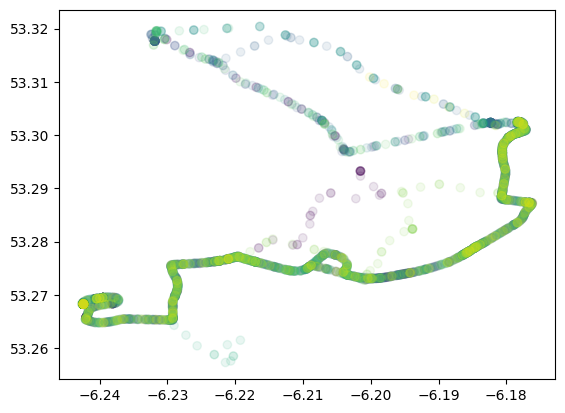

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x=df114['LonWGS84'], y=df114['LatWGS84'], alpha=0.1, c=df114['Hour'] )

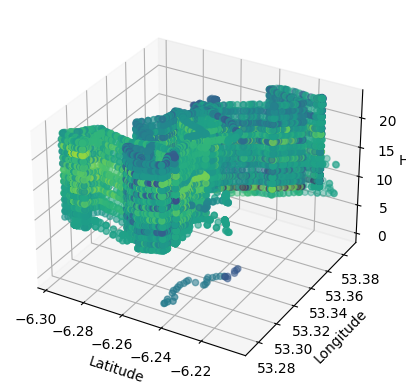

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df14['LonWGS84'], df14['LatWGS84'], df14['Hour'], c=df14['Delay'] )
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Hour')
plt.show()

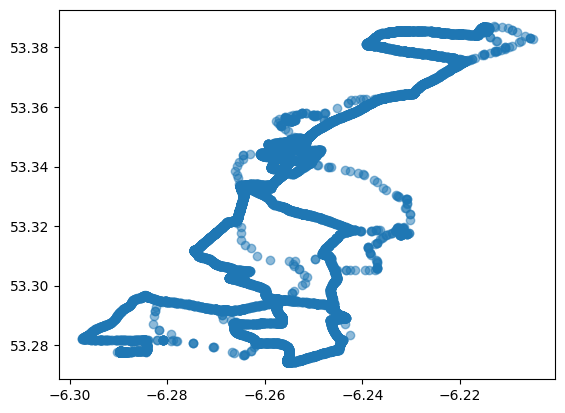

In [5]:
plt.scatter(x=df114['LonWGS84'], y=df114['LatWGS84'], alpha=0.5 )

In [ ]:
%pip install plotly
%pip install -U kaleido

In [ ]:
import plotly.express as px

fig = px.scatter_geo(df63, lat='LatWGS84', lon='LonWGS84', hover_name="LineID")

import plotly.graph_objects as go
fig1 = go.Figure(data=go.Scattergeo(lon=df1['LonWGS84'], lat=df1['LatWGS84'], mode ='markers'))

#fig2 = go.Choroplethmapbox(x=df1['LonWGS84'], y=df1['LatWGS84'] ) # type: ignore

fig.show()

In [ ]:
fig.update_layout(title = 'Dublin Bus Locations', geo_scope='europe')

fig.write_html("dublinbusmap.html")



In [ ]:
fig1.update_layout(title = 'Dublin Bus Locations', geo_scope='europe')
fig1.write_image('dublinbusmap.png')
fig1.show()

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

counties["features"][0]

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})
df.head()

In [ ]:
from urllib.request import urlopen
import json
#https://data-osi.opendata.arcgis.com/datasets/b13ec621a0bc4c05afe7c2c1b3109da1_0.geojson?outSR=%7B%22latestWkid%22%3A2157%2C%22wkid%22%3A2157%7D
with urlopen('https://data-osi.opendata.arcgis.com/datasets/b13ec621a0bc4c05afe7c2c1b3109da1_0.geojson?outSR=%7B%22latestWkid%22%3A2157%2C%22wkid%22%3A2157%7D') as response:
    provinvces = json.load(response)

import plotly.express as px

fig = px.choropleth_mapbox(df1, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')
plt.scatter(x=df1['LonWGS84'], y=df1['LatWGS84'], alpha=0.1, c=df1['Hour'] )

sizes = df1['LineID']
colors = df1['Delay']

fig, ax = plt.subplots()

ax.scatter(x=df1['LonWGS84'], y=df1['LatWGS84'], s=sizes, c=colors, vmin=0, vmax=100)



ax.set(xlim=(min(df1['LonWGS84']), max(df1['LonWGS84'])), xticks=np.arange(min(df1['LonWGS84']), max(df1['LonWGS84'])),
       ylim=(min(df1['LatWGS84']), max(df1['LatWGS84'])), yticks=np.arange(min(df1['LatWGS84']), max(df1['LatWGS84'])))

plt.show()